In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [105]:
data = pd.read_csv(r"C:\Users\siddu\Downloads\spam.csv", encoding="Latin_1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [106]:
data.shape

(5572, 5)

In [107]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [108]:
data=data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1 )

In [109]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [110]:
data.shape

(5572, 2)

In [13]:
data=data.rename(columns={"v1":"label", "v2":"text"})

In [14]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
data.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
data['label_num']=data.label.map({'ham':0,'spam':1})

In [17]:
data

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [18]:
data['length']=data['text'].apply(len)

In [19]:
data


,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


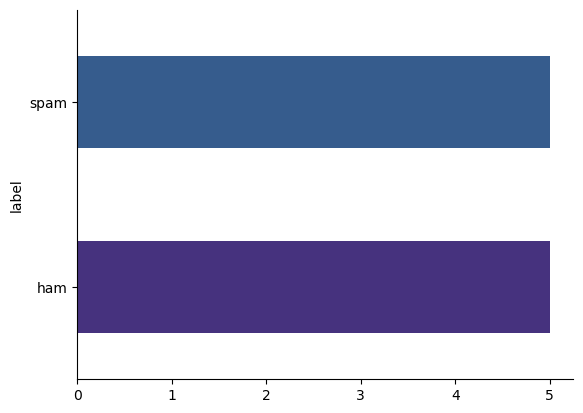

In [102]:
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
x=np.array(data['text'])
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [22]:
y=np.array(data['label_num'])
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

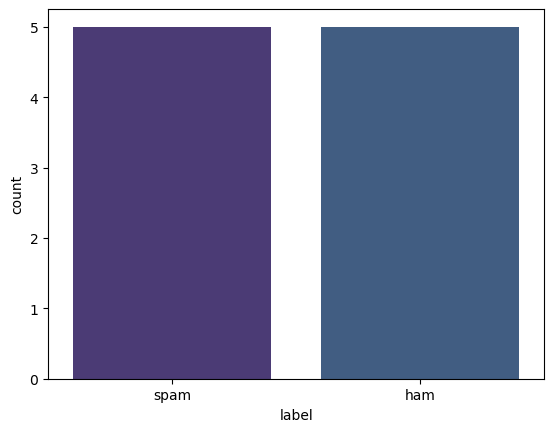

In [103]:
sns.countplot(x="label", data=data)
sns.set_palette("viridis")
plt.show()


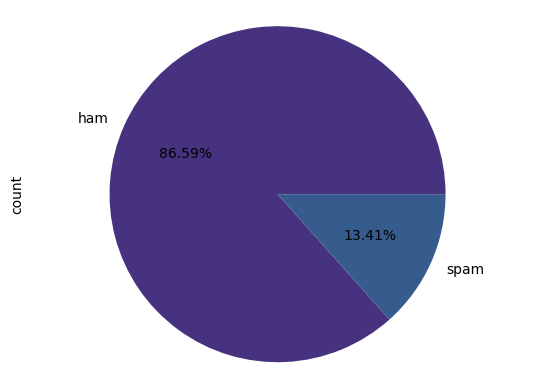

In [35]:
data["label"].value_counts().plot(kind="pie",autopct="%2.2f%%")
sns.set_palette("viridis")
plt.axis("equal")
plt.show()

In [36]:
spam1=data.loc[data['label']=='spam']
spam1["text"].head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: text, dtype: object

In [37]:
spam1=data.loc[data['label']=='ham']
spam1["text"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: text, dtype: object

In [38]:
x_train=np.array(data.iloc[0:500,1])
x_train[0:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

In [39]:
x_train=np.array(data.iloc[0:500,0])
x_train[0:6]

array(['ham', 'ham', 'spam', 'ham', 'ham', 'spam'], dtype=object)

In [40]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [49]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
model=MultinomialNB()
model.fit(train_data,y_train)

MultinomialNB()

In [52]:
pred=model.predict(test_data)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
model.score(test_data,y_test)

0.9832535885167464

In [54]:
from sklearn.metrics import classification_report
nbreport=classification_report(y_test, pred)
print(nbreport)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1454
           1       0.96      0.91      0.93       218

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [56]:
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]

In [57]:
x=["f1score","recall","precision"]
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]
df = pd.DataFrame(dict(x=x, y=y))
df

,x,y
0,f1score,0.934272
1,recall,0.912844
2,precision,0.956731


In [67]:
print(data.columns)

Index(['label', 'message'], dtype='object')


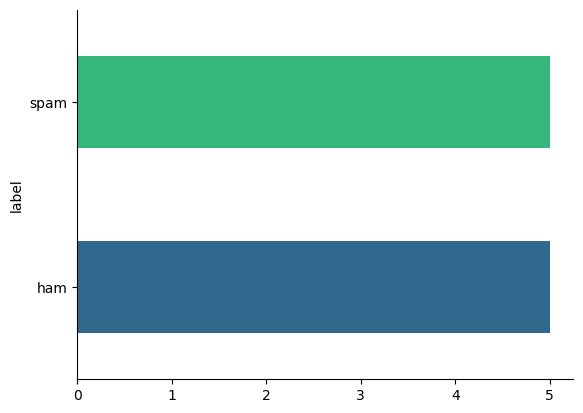

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns


colors = sns.color_palette('viridis', len(data['label'].unique()))

# Plotting
data.groupby('label').size().plot(kind='barh', color=colors)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

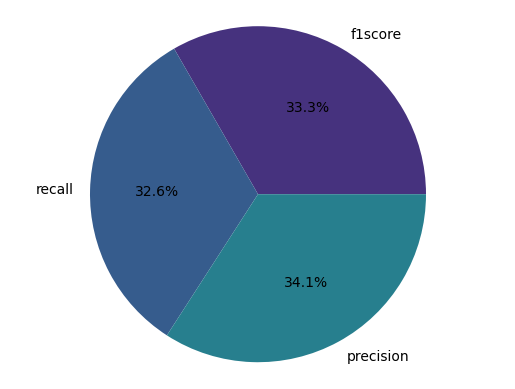

In [79]:
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis("equal")
plt.show()

In [80]:
x_test=[ "hi how are you",
        "Free entry in 2 a wkly comp to win FA Cup fina...",
        "when will you go to home",
        "i will call you back",
        "are you busy now"]

In [82]:
x_test.append("goodmoring")
x_test.append("WINNER!! As a valued network customer you have...")

In [83]:
x_test

['hi how are you',
 'Free entry in 2 a wkly comp to win FA Cup fina...',
 'when will you go to home',
 'i will call you back',
 'are you busy now',
 'goodmoring',
 'WINNER!! As a valued network customer you have...',
 'goodmoring',
 'WINNER!! As a valued network customer you have...']

In [84]:
x_test1=np.array(x_test)
x_test1

array(['hi how are you',
       'Free entry in 2 a wkly comp to win FA Cup fina...',
       'when will you go to home', 'i will call you back',
       'are you busy now', 'goodmoring',
       'WINNER!! As a valued network customer you have...', 'goodmoring',
       'WINNER!! As a valued network customer you have...'], dtype='<U49')

In [85]:
X_train=data.iloc[0:200,1]
X_train[0:6]

0               Hello
1        How are you?
2          Free offer
3    Meeting tomorrow
4     Congratulations
5      Check this out
Name: message, dtype: object

In [86]:
Y_train=data.iloc[0:200,0]
Y_train[0:5]

0    spam
1     ham
2    spam
3     ham
4    spam
Name: label, dtype: object

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [88]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(x_test1)

In [89]:
train_data.shape

(10, 18)

In [90]:
test_data.shape

(9, 18)

In [91]:
Y_train.shape

(10,)

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
model=MultinomialNB()
model.fit(train_data,Y_train)

MultinomialNB()

In [94]:
pred=model.predict(test_data)
pred

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'],
      dtype='<U4')

In [96]:
y1=model.predict(test_data)

In [97]:
y1

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'],
      dtype='<U4')

In [99]:
df = pd.DataFrame(dict(INPUT=x_test1, OUTPUT=y1))
df

,INPUT,OUTPUT
0,hi how are you,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,when will you go to home,ham
3,i will call you back,ham
4,are you busy now,ham
5,goodmoring,ham
6,WINNER!! As a valued network customer you have...,ham
7,goodmoring,ham
8,WINNER!! As a valued network customer you have...,ham


In [101]:
df.iloc[4:]

,INPUT,OUTPUT
4,are you busy now,ham
5,goodmoring,ham
6,WINNER!! As a valued network customer you have...,ham
7,goodmoring,ham
8,WINNER!! As a valued network customer you have...,ham
